In [1]:
!pip install super-gradients==3.1.0
!pip install imutils
!pip install roboflow
!pip install pytube --upgrade

Defaulting to user installation because normal site-packages is not writeable
  Using cached super_gradients-3.1.0-py3-none-any.whl (965 kB)
  Using cached torch-1.13.1-cp39-cp39-win_amd64.whl (162.5 MB)
  Using cached boto3-1.26.165-py3-none-any.whl (135 kB)
  Using cached Deprecated-1.2.14-py2.py3-none-any.whl (9.6 kB)
  Using cached coverage-5.3.1-cp39-cp39-win_amd64.whl (212 kB)
  Using cached Sphinx-4.0.3-py3-none-any.whl (2.9 MB)
  Using cached sphinx_rtd_theme-1.2.2-py2.py3-none-any.whl (2.8 MB)
  Using cached torchmetrics-0.8.0-py3-none-any.whl (408 kB)
  Using cached hydra_core-1.3.2-py3-none-any.whl (154 kB)
  Using cached onnxruntime-1.13.1-cp39-cp39-win_amd64.whl (5.9 MB)
  Using cached onnx-1.13.0-cp39-cp39-win_amd64.whl (12.2 MB)
  Using cached pip_tools-6.14.0-py3-none-any.whl (55 kB)
  Using cached pyparsing-2.4.5-py2.py3-none-any.whl (67 kB)
  Using cached einops-0.3.2-py3-none-any.whl (25 kB)
  Using cached pycocotools-2.0.4.tar.gz (106 kB)
  Installing build dependen

  error: subprocess-exited-with-error
  
  exit code: 1
  
  [14 lines of output]
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-39
  creating build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-39\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-39\pycocotools
  running build_ext
  skipping 'pycocotools\_mask.c' Cython extension (up-to-date)
  building 'pycocotools._mask' extension
  error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pycocotool

Defaulting to user installation because normal site-packages is not writeable
  Using cached imutils-0.5.4-py3-none-any.whl


Defaulting to user installation because normal site-packages is not writeable


Defaulting to user installation because normal site-packages is not writeable


In [2]:
# Importing Required Libraries
from super_gradients.training import Trainer
from super_gradients.training import dataloaders
from super_gradients.training.dataloaders.dataloaders import coco_detection_yolo_format_train, coco_detection_yolo_format_val
from IPython.display import clear_output
from super_gradients.training.losses import PPYoloELoss
from super_gradients.training.metrics import DetectionMetrics_050
from super_gradients.training.models.detection_models.pp_yolo_e import PPYoloEPostPredictionCallback
from super_gradients.training import models

ModuleNotFoundError: No module named 'super_gradients'

In [3]:
# Importing Dataset
CHECKPOINT_DIR = 'checkpoints2'
trainer = Trainer(experiment_name='ppe_yolonas_run2', ckpt_root_dir=CHECKPOINT_DIR)

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="7kq9kKZSOqXNzpHFeB1u")
project = rf.workspace("ps1-project").project("dataset-ps1-v2-ia0e9")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
[WARNING] we noticed you are downloading a `yolov8` datasets but you don't have `ultralytics` installed. Roboflow `.deploy` supports only models trained with `ultralytics<=8.0.20`, to intall it `pip install ultralytics<=8.0.20`.


Extracting Dataset Version Zip to Dataset-PS1-v2-1 in yolov8:: 100%|██████████| 718/718 [00:01<00:00, 562.33it/s]


In [4]:
dataset_params = {
    'data_dir':'/content/Dataset-PS1-v2-1',
    'train_images_dir':'train/images',
    'train_labels_dir':'train/labels',
    'val_images_dir':'valid/images',
    'val_labels_dir':'valid/labels',
    'test_images_dir':'test/images',
    'test_labels_dir':'test/labels',
    'classes': ['damper','insulator','plate','spacer','tower']
}


In [20]:
train_data = coco_detection_yolo_format_train(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['train_images_dir'],
        'labels_dir': dataset_params['train_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

val_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['val_images_dir'],
        'labels_dir': dataset_params['val_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)

test_data = coco_detection_yolo_format_val(
    dataset_params={
        'data_dir': dataset_params['data_dir'],
        'images_dir': dataset_params['test_images_dir'],
        'labels_dir': dataset_params['test_labels_dir'],
        'classes': dataset_params['classes']
    },
    dataloader_params={
        'batch_size':8,
        'num_workers':2
    }
)


Caching annotations: 100%|██████████| 15/15 [00:00<00:00, 1825.52it/s]


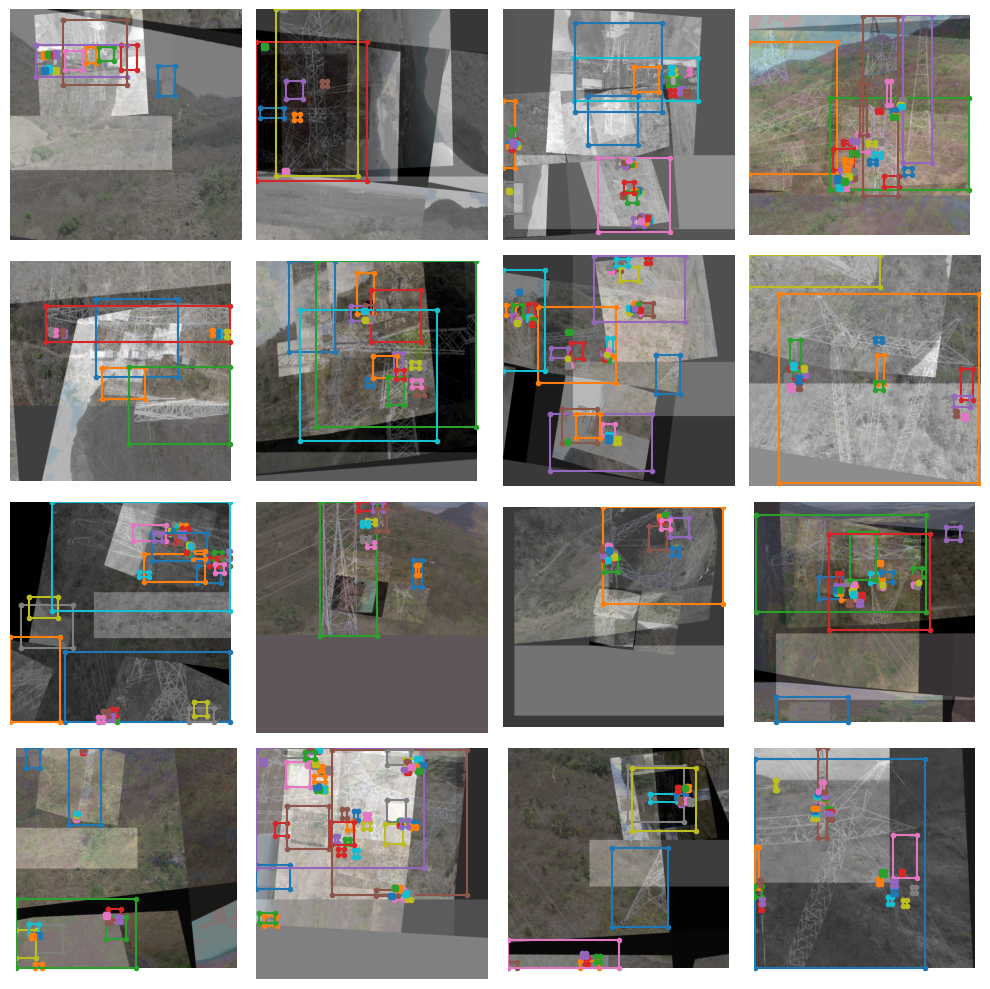

In [13]:
# train_data.dataset.dataset_params['transforms'][1]['DetectionRandomAffine']['degrees'] = 10.42
train_data.dataset.plot()

In [26]:
model = models.get('yolo_nas_l',
                   num_classes=len(dataset_params['classes']),
                   pretrained_weights="coco"
                   )

[2023-07-01 13:25:11] INFO - checkpoint_utils.py - License Notification: YOLO-NAS pre-trained weights are subjected to the specific license terms and conditions detailed in 
https://github.com/Deci-AI/super-gradients/blob/master/LICENSE.YOLONAS.md
By downloading the pre-trained weight files you agree to comply with these terms.


In [27]:
train_params = {
    # ENABLING SILENT MODE
    'silent_mode': True,
    "average_best_models":True,
    "warmup_mode": "linear_epoch_step",
    "warmup_initial_lr": 1e-6,
    "lr_warmup_epochs": 3,
    "initial_lr": 5e-4,
    "lr_mode": "cosine",
    "cosine_final_lr_ratio": 0.1,
    "optimizer": "Adam",
    "optimizer_params": {"weight_decay": 0.0001},
    "zero_weight_decay_on_bias_and_bn": True,
    "ema": True,
    "ema_params": {"decay": 0.9, "decay_type": "threshold"},
    "max_epochs": 50,
    "mixed_precision": True,
    "loss": PPYoloELoss(
        use_static_assigner=False,
        # NOTE: num_classes needs to be defined here
        num_classes=len(dataset_params['classes']),
        reg_max=16
    ),
    "valid_metrics_list": [
        DetectionMetrics_050(
            score_thres=0.1,
            top_k_predictions=300,
            # NOTE: num_classes needs to be defined here
            num_cls=len(dataset_params['classes']),
            normalize_targets=True,
            post_prediction_callback=PPYoloEPostPredictionCallback(
                score_threshold=0.01,
                nms_top_k=1000,
                max_predictions=300,
                nms_threshold=0.7
            )
        )
    ],
    "metric_to_watch": 'mAP@0.50'
}

In [28]:
# Training the Model
trainer.train(model=model,
              training_params=train_params,
              train_loader=train_data,
              valid_loader=val_data)

[2023-07-01 13:42:28] INFO - sg_trainer.py - Using EMA with params {'decay': 0.9, 'decay_type': 'threshold'}


The console stream is now moved to checkpoints2/ppe_yolonas_run2/console_Jul01_13_42_28.txt


[2023-07-01 13:42:36] INFO - sg_trainer_utils.py - TRAINING PARAMETERS:
    - Mode:                         Single GPU
    - Number of GPUs:               1          (1 available on the machine)
    - Dataset size:                 330        (len(train_set))
    - Batch size per GPU:           8          (batch_size)
    - Batch Accumulate:             1          (batch_accumulate)
    - Total batch size:             8          (num_gpus * batch_size)
    - Effective Batch size:         8          (num_gpus * batch_size * batch_accumulate)
    - Iterations per epoch:         41         (len(train_loader))
    - Gradient updates per epoch:   41         (len(train_loader) / batch_accumulate)

[2023-07-01 13:44:07] INFO - base_sg_logger.py - Checkpoint saved in checkpoints2/ppe_yolonas_run2/ckpt_best.pth
[2023-07-01 13:44:07] INFO - sg_trainer.py - Best checkpoint overriden: validation mAP@0.50: 0.026491621509194374
[2023-07-01 13:46:03] INFO - base_sg_logger.py - Checkpoint saved in chec

SUMMARY OF EPOCH 50
├── Training
│   ├── Ppyoloeloss/loss = 1.9094
│   │   ├── Best until now = 1.8605 (↗ 0.0489)
│   │   └── Epoch N-1      = 1.8992 (↗ 0.0102)
│   ├── Ppyoloeloss/loss_cls = 0.8273
│   │   ├── Best until now = 0.8193 (↗ 0.0081)
│   │   └── Epoch N-1      = 0.8328 (↘ -0.0054)
│   ├── Ppyoloeloss/loss_dfl = 0.9702
│   │   ├── Best until now = 0.9363 (↗ 0.0339)
│   │   └── Epoch N-1      = 0.958  (↗ 0.0122)
│   └── Ppyoloeloss/loss_iou = 0.2388
│       ├── Best until now = 0.2292 (↗ 0.0095)
│       └── Epoch N-1      = 0.235  (↗ 0.0038)
└── Validation
    ├── F1@0.50 = 0.0664
    │   ├── Best until now = 0.1024 (↘ -0.036)
    │   └── Epoch N-1      = 0.0693 (↘ -0.003)
    ├── Map@0.50 = 0.671
    │   ├── Best until now = 0.6655 (↗ 0.0056)
    │   └── Epoch N-1      = 0.6607 (↗ 0.0104)
    ├── Ppyoloeloss/loss = 1.5237
    │   ├── Best until now = 1.5942 (↘ -0.0705)
    │   └── Epoch N-1      = 1.6433 (↘ -0.1196)
    ├── Ppyoloeloss/loss_cls = 0.7727
    │   ├── Best unti

In [29]:
best_model = models.get('yolo_nas_l',
                        num_classes=len(dataset_params['classes']),
                        checkpoint_path="checkpoints2/ppe_yolonas_run2/ckpt_best.pth")

[2023-07-01 16:17:07] INFO - checkpoint_utils.py - Successfully loaded model weights from checkpoints2/ppe_yolonas_run2/ckpt_best.pth EMA checkpoint.


In [30]:
trainer.test(model=best_model,
            test_loader=test_data,
            test_metrics_list=DetectionMetrics_050(score_thres=0.1,
                                                   top_k_predictions=300,
                                                   num_cls=len(dataset_params['classes']),
                                                   normalize_targets=True,
                                                   post_prediction_callback=PPYoloEPostPredictionCallback(score_threshold=0.01,
                                                                                                          nms_top_k=1000,
                                                                                                          max_predictions=300,
                                                                                                          nms_threshold=0.7)
                                                  ))

Test: 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]


{'PPYoloELoss/loss_cls': 0.83199394,
 'PPYoloELoss/loss_iou': 0.19154029,
 'PPYoloELoss/loss_dfl': 0.74675006,
 'PPYoloELoss/loss': 1.6842197,
 'Precision@0.50': tensor(0.0483),
 'Recall@0.50': tensor(0.7661),
 'mAP@0.50': tensor(0.6362),
 'F1@0.50': tensor(0.0895)}

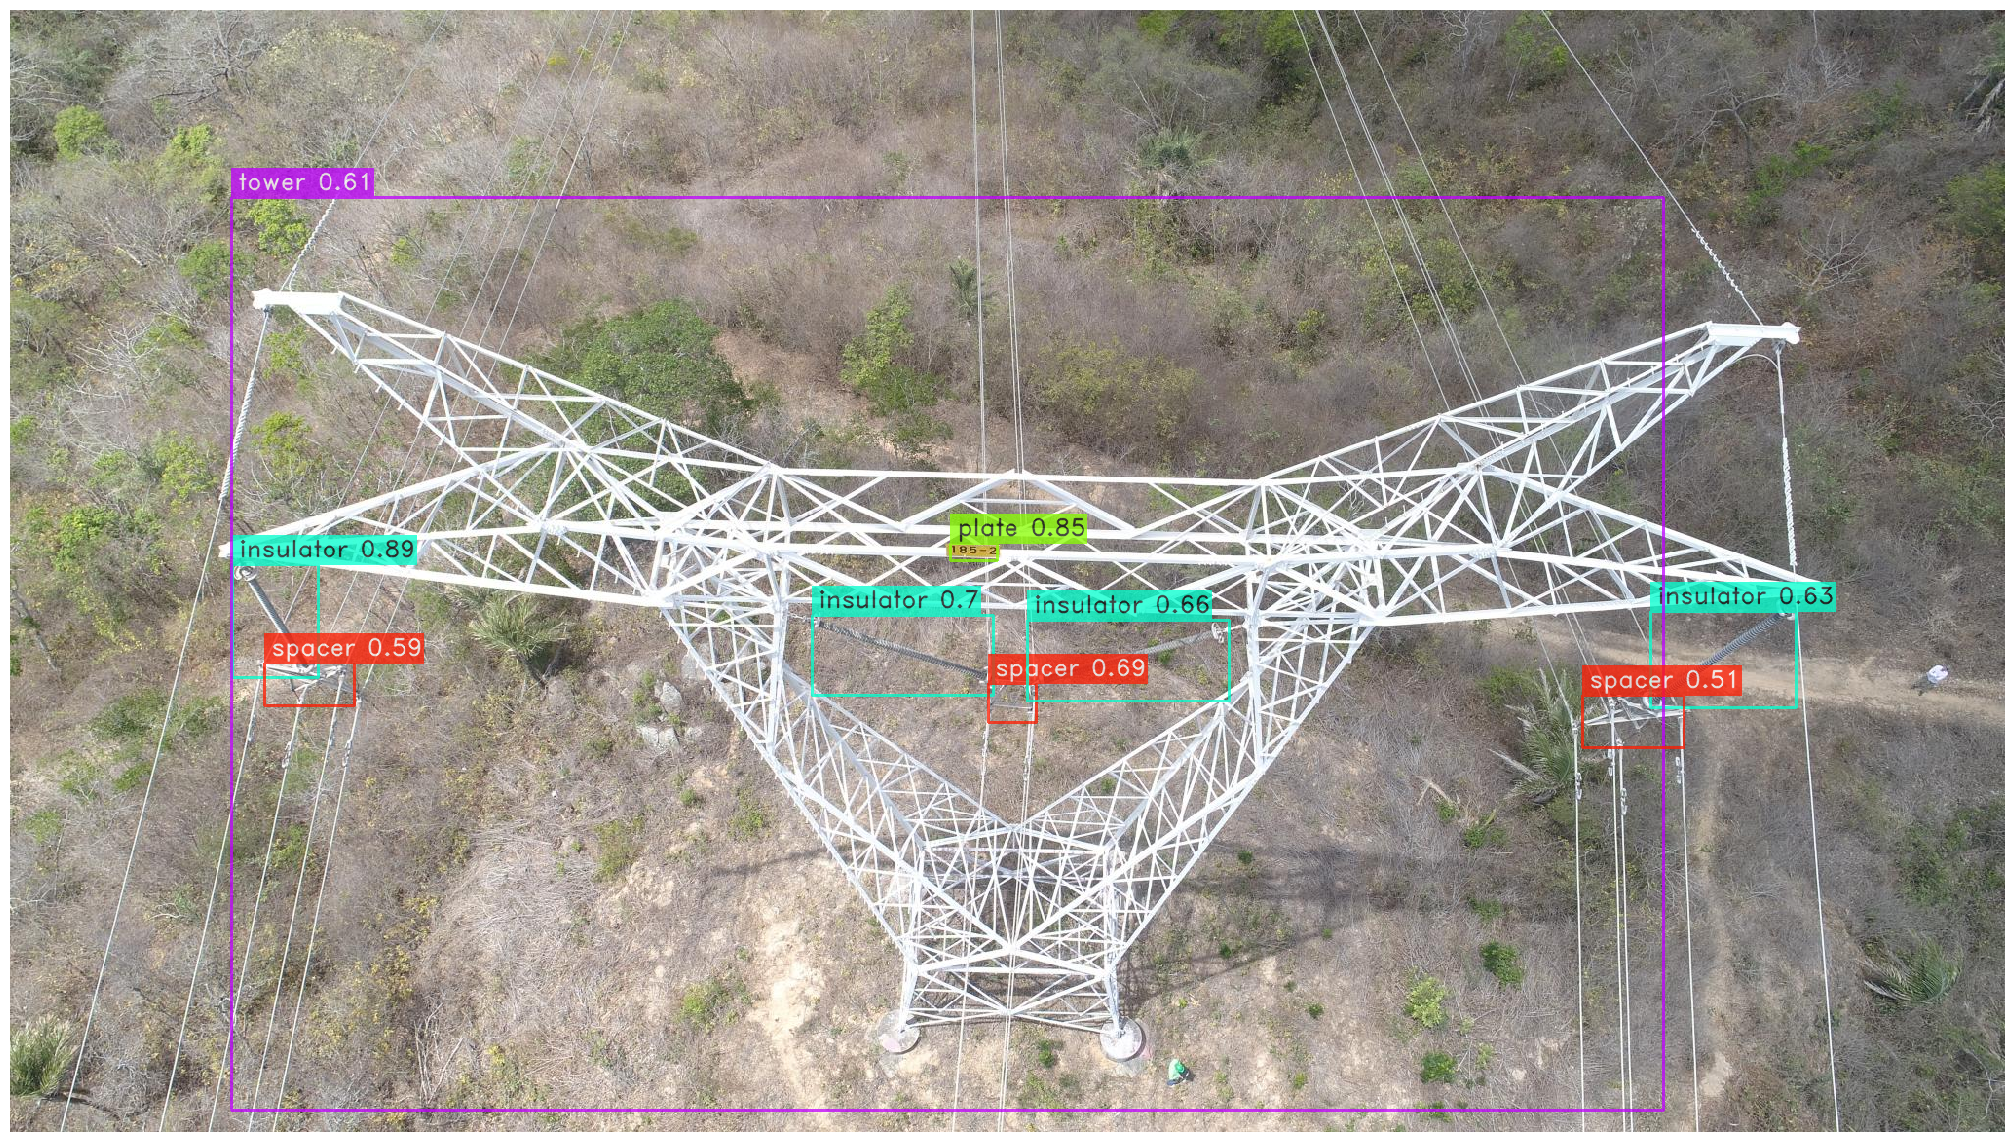

In [33]:
# Predicting on an image
img_url = '/content/Dataset-PS1-3/valid/0 1 2 3 5/DJI_0512_JPG.rf.0d77ee813ac7bb87eca76c393718c275.jpg'
best_model.predict(img_url).show()